# Instructor: Quan Thanh Tho
# Student: Nguyen Phuoc Vinh Loc
# Class: MSE09
# Subject: Text Mining
# Algorithm: K-means

---

Data:

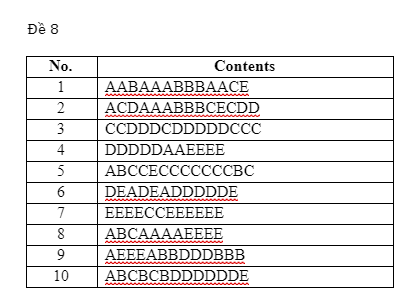

In [1]:
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix

In [5]:
dataset_array = {
    1:"AABAAABBBAACE",
    2:"ACDAAABBBCECDD",
    3:"CCDDDCDDDDDCCC",
    4:"DDDDDAAEEEE",
    5:"ABCCECCCCCCCBC",
    6:"DEADEADDDDDE",
    7:"EEEECCEEEEEE",
    8:"ABCAAAAEEEE",
    9:"AEEEABBDDDBBB",
    10:"ABCBCBDDDDDDE",
}
dataset = pd.DataFrame(zip(dataset_array, dataset_array.values()), columns=["No", "Content"])
dataset

,No,Content
0,1,AABAAABBBAACE
1,2,ACDAAABBBCECDD
2,3,CCDDDCDDDDDCCC
3,4,DDDDDAAEEEE
4,5,ABCCECCCCCCCBC
5,6,DEADEADDDDDE
6,7,EEEECCEEEEEE
7,8,ABCAAAAEEEE
8,9,AEEEABBDDDBBB
9,10,ABCBCBDDDDDDE


In [3]:
def plot_cm(y_true, y_pred, figsize=(6,5)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [12]:
vectorizer = TfidfVectorizer(analyzer="char")
X = vectorizer.fit_transform(dataset["Content"]).toarray()
vocab = vectorizer.get_feature_names()
X

array([[0.8113415 , 0.56066558, 0.12727603, 0.        , 0.10573502],
       [0.54428877, 0.49366108, 0.44826168, 0.49366108, 0.12413167],
       [0.        , 0.        , 0.56289003, 0.8265318 , 0.        ],
       [0.27247848, 0.        , 0.        , 0.82377852, 0.49713622],
       [0.08829741, 0.21355818, 0.96959182, 0.        , 0.08054919],
       [0.21933163, 0.        , 0.        , 0.92834107, 0.30012746],
       [0.        , 0.        , 0.234058  , 0.        , 0.97222263],
       [0.7810268 , 0.18890097, 0.17152875, 0.        , 0.5699925 ],
       [0.25562876, 0.77283714, 0.        , 0.46370229, 0.34979548],
       [0.11747237, 0.42618214, 0.25799228, 0.85236429, 0.10716401]])

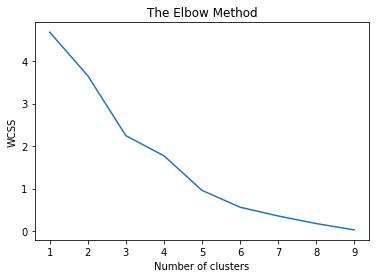

In [15]:
wcss = []
num = 10
for i in range(1,num): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 1, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,num), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Từ đồ thị trên, chúng ta sẽ sử dụng `n_clusters = 6` để giải quyết các bước tiếp theo.

In [26]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 1, 5, 0, 4, 0, 2, 3, 1, 5], dtype=int32)

In [27]:
kmeans.cluster_centers_

array([[0.24590505, 0.        , 0.        , 0.8760598 , 0.39863184],
       [0.39995877, 0.63324911, 0.22413084, 0.47868168, 0.23696357],
       [0.        , 0.        , 0.234058  , 0.        , 0.97222263],
       [0.79618415, 0.37478328, 0.14940239, 0.        , 0.33786376],
       [0.08829741, 0.21355818, 0.96959182, 0.        , 0.08054919],
       [0.05873619, 0.21309107, 0.41044116, 0.83944804, 0.053582  ]])

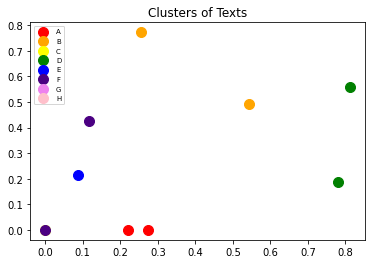

In [28]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s = 100, c = 'red', label = 'A')  
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s = 100, c = 'orange', label = 'B')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s = 100, c = 'yellow', label = 'C')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1], s = 100, c = 'green', label = 'D')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4,1], s = 100, c = 'blue', label = 'E')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5,1], s = 100, c = 'indigo', label = 'F')
plt.scatter(X[y_kmeans == 6, 0], X[y_kmeans == 6,1], s = 100, c = 'violet', label = 'G')
plt.scatter(X[y_kmeans == 7, 0], X[y_kmeans == 7,1], s = 100, c = 'pink', label = 'H')
plt.title('Clusters of Texts')
plt.legend(loc=0, numpoints=10, ncol=1, fontsize=7)
plt.show()